In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from ase.data import atomic_numbers
import matplotlib.pyplot as plt

In [2]:
df_salex = np.load('edge_info/salex.npy', mmap_mode='r')
df_salex = pd.DataFrame.from_records(df_salex)
df_salex.head()

,dataset_index,edge_index_src,edge_index_dst,atomic_numbers,oxygen_distance
0,267,0,4,40,4.746094
1,267,0,5,40,5.332031
2,267,0,4,40,4.746094
3,267,0,5,40,4.187500
4,267,0,5,40,5.332031


In [3]:
u_elements = ['Co', 'Cr', 'Fe', 'Mn', 'Mo', 'Ni', 'V', 'W']
u_numbers = [atomic_numbers[element] for element in u_elements]

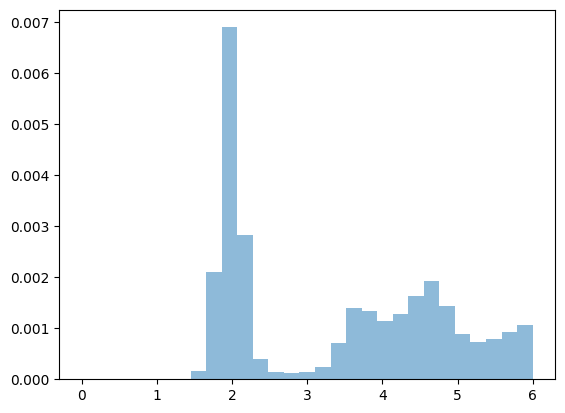

In [4]:
def plot_oxygen_distance_hist(df, numbers, ax=None, bins=30, radial_normalization=True, density=True, label=None):
    distances = df.oxygen_distance[np.isin(df.atomic_numbers, numbers)]

    if ax is None:
        fig, ax = plt.subplots()
        ylabel = 'Density' if density else 'Count'
        if radial_normalization: ylabel += ' / Shell Volume'
        ax.set_xlabel('Radial Distance / Å')
        ax.set_ylabel(ylabel)

    counts, bin_edges = np.histogram(distances, np.linspace(0, 6, bins), density=density)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]
    
    alpha = (0.5 if label else None)
    if radial_normalization:
        ax.bar(bin_centers, counts/(4*np.pi*bin_centers**2), width=bin_width, label=label, alpha=alpha)
    else:
        ax.bar(bin_centers, counts, width=bin_width, label=label, alpha=alpha)


    return ax

fig, ax = plt.subplots()
ax = plot_oxygen_distance_hist(df_salex, u_numbers, label='salex', ax=ax)
del df_salex

In [5]:
df_mptrj = np.load('edge_info/mptrj.npy', mmap_mode='r')
df_mptrj = pd.DataFrame.from_records(df_mptrj)
df_mptrj.head()

,dataset_index,edge_index_src,edge_index_dst,atomic_numbers,oxygen_distance
0,13,0,16,3,3.527344
1,13,0,21,3,5.257812
2,13,0,12,3,5.261719
3,13,0,16,3,3.527344
4,13,0,21,3,5.257812


In [6]:
ax = plot_oxygen_distance_hist(df_mptrj, u_numbers, ax=ax, label='mptrj')
ax.legend()
fig.show()
fig.savefig('o-x.png')

![histograms](o-x.png "Title")